# Introduction to Climate Change

Section outline:
* weather vs climate
* History of research into climate change & global warming
* introduction to climate data sources
  * observations
  * modelling - CMIP6, UKCP

## The difference between weather and climate

Weather is what is happening at a particular moment

Climate is about long-term averages and extremes 
* average/min/max weather value for a region for a period of time
  * e.g. average daily max for february for Exeter
  * Highest temperature recorded in the UK.
  * Annual average rainfall for Florida

## History of Climate Research

Discovery of Global Warming

Studying Climate Change

## Introduction to climate datasets

Two sources for studying climate change: observations and modelling
* observations - what is the current and past state of climate
* direct - climate obs datasets
  * e.g. Central England Temperature
  * different sorts - ground stattions, satellites
  * ocean and atmosphere
* indirect - long-term *Paleoclimate*
  * ice cores
  * tree rings
  * radio-isotopes
Describe how climate datasets are produced

Aim is not individual weather events but likely future scenarios

The other source is climate climate simulations. As a starting point we use climate simulations with observations to create a physically consistent model of the whole world to fill in the gaps between measurements, called *reanalysis*
 One example of this is the *ERA5* dataset produced by the European Centre for Medrium-range Weather Forecasting (ECMWF).

In [ ]:
# load era5 data from AWS S3

In [100]:
# plot data for March 2020: gridded data and time series.

### CMIP6

Modelling different scenarios
Climate model as an experiment
Standard dataset for future climate
used as input for IPCC reports that feed into COP UN Framework Convention of Climate Change

How to access CMIP6 data through AWS and intake

In [9]:
import pathlib
import datetime

In [62]:
import matplotlib
import matplotlib.pyplot

In [66]:
import iris
import iris.coord_categorisation
import iris.quickplot
import cartopy
import cartopy.crs

In [ ]:
# define paramters for access CMIP6

In [ ]:
# load some data for different scenarios

In [ ]:
# calculate monthly means for different years for multiple ensemble memebers

In [ ]:
# calculate a time a series for Exeter? UK? 

### UK Climate Projections

https://www.metoffice.gov.uk/research/approach/collaboration/ukcp/index

Climate projections for the next 100 years

In [ ]:
#Met Office stuff
root_dir = '/project/ukcp/land-cpm/uk/2.2km/rcp85'


In [42]:
selected_var = 'tasmax'
ensemble_member_list = [1,4,5,6,7,8,9,10,11,12,13,15]
ensemble_member = ensemble_member_list[0]
data_version = 'v20190731'
scenario = 'rcp85'
data_category = 'land-cpm'
selected_area = 'uk'
res = '2.2km'
freq = 'day'
format_ext = 'nc'

In [43]:
start_date = datetime.datetime(2020,12,1)
end_date = datetime.datetime(2021,11,30)

In [44]:
start_date_str = f'{start_date.year:04d}{start_date.month:02d}{start_date.day:02d}'
end_date_str = f'{end_date.year:04d}{end_date.month:02d}{end_date.day:02d}'

In [45]:
fname1 = f'{selected_var}_{scenario}_{data_category}_{selected_area}_{res}_{ensemble_member:02d}_{freq}_{start_date_str}-{end_date_str}.{format_ext}'
data_path1 = pathlib.Path(root_dir) / f'{ensemble_member:02d}' / selected_var / 'day' / data_version / fname1
data_path1

PosixPath('/project/ukcp/land-cpm/uk/2.2km/rcp85/01/tasmax/day/v20190731/tasmax_rcp85_land-cpm_uk_2.2km_01_day_20201201-20211130.nc')

In [48]:
temp_cube_2020_01 = iris.load_cube(str(data_path1))
temp_cube_2020_01

Air Temperature (degC),ensemble_member,time,grid_latitude,grid_longitude
Shape,1,360,606,484
Dimension coordinates,,,,
ensemble_member,x,-,-,-
time,-,x,-,-
grid_latitude,-,-,x,-
grid_longitude,-,-,-,x
Auxiliary coordinates,,,,
ensemble_member_id,x,-,-,-
month_number,-,x,-,-
year,-,x,-,-


In [54]:
iris.coord_categorisation.add_season(temp_cube_2020_01, 'time', name='clim_season')

In [60]:
temp_seasonal_means = temp_cube_2020_01.aggregated_by(['clim_season'], iris.analysis.MEAN)
[i1 for i1 in temp_seasonal_means.coord('time').cells()]

[Cell(point=cftime.Datetime360Day(2021, 1, 16, 0, 0, 0, 0), bound=(cftime.Datetime360Day(2020, 12, 1, 0, 0, 0, 0), cftime.Datetime360Day(2021, 3, 1, 0, 0, 0, 0))),
 Cell(point=cftime.Datetime360Day(2021, 4, 16, 0, 0, 0, 0), bound=(cftime.Datetime360Day(2021, 3, 1, 0, 0, 0, 0), cftime.Datetime360Day(2021, 6, 1, 0, 0, 0, 0))),
 Cell(point=cftime.Datetime360Day(2021, 7, 16, 0, 0, 0, 0), bound=(cftime.Datetime360Day(2021, 6, 1, 0, 0, 0, 0), cftime.Datetime360Day(2021, 9, 1, 0, 0, 0, 0))),
 Cell(point=cftime.Datetime360Day(2021, 10, 16, 0, 0, 0, 0), bound=(cftime.Datetime360Day(2021, 9, 1, 0, 0, 0, 0), cftime.Datetime360Day(2021, 12, 1, 0, 0, 0, 0)))]

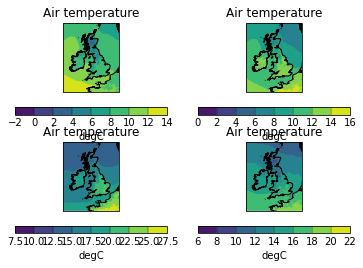

In [75]:
matplotlib.pyplot.subplot(2,2,1)
iris.quickplot.contourf(temp_seasonal_means[0,0,:,:])
matplotlib.pyplot.gca().coastlines()
matplotlib.pyplot.subplot(2,2,2)
iris.quickplot.contourf(temp_seasonal_means[0,1,:,:])
matplotlib.pyplot.gca().coastlines()
matplotlib.pyplot.subplot(2,2,3)
iris.quickplot.contourf(temp_seasonal_means[0,2,:,:])
matplotlib.pyplot.gca().coastlines()
matplotlib.pyplot.subplot(2,2,4)
iris.quickplot.contourf(temp_seasonal_means[0,3,:,:])
matplotlib.pyplot.gca().coastlines()

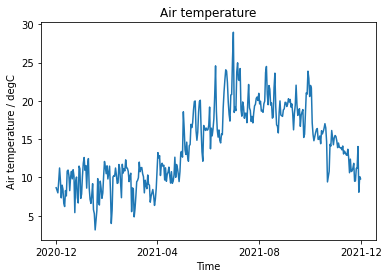

In [99]:
iris.quickplot.plot(temp_cube_2020_01[0,:,129,234])

Download UKCP from CEDA
* rss https://data.ceda.ac.uk/badc/ukcp18/data/land-cpm/uk/2.2km/rcp85/15/rss/day/v20190731
* sfcWind https://data.ceda.ac.uk/badc/ukcp18/data/land-cpm/uk/2.2km/rcp85/15/sfcWind/day/v20190731
* tasmax https://data.ceda.ac.uk/badc/ukcp18/data/land-cpm/uk/2.2km/rcp85/15/tasmax/day/v20190731
* tasmin https://data.ceda.ac.uk/badc/ukcp18/data/land-cpm/uk/2.2km/rcp85/15/tasmin/day/v20190731

### Interactively exploring local climate change

BBC tools to see how local areas will be affected, based on UKCP
https://www.bbc.co.uk/news/resources/idt-d6338d9f-8789-4bc2-b6d7-3691c0e7d138
